In [47]:
def py_slow_sin(x,n_terms):
        sin_py = 0
        for i in range(n_terms):
                if i%2==0:
                        signo = 1
                else:
                        signo = -1
                        
                factorial = 1
                for j in range(1,2*i+2):
                        factorial *= j
                
                termino = (signo*(x**(2*i+1)))/factorial
                sin_py += termino
        return sin_py

In [48]:
def py_fast_sin(x,n_terms):
    sin_py = 0
    termino = x
    for i in range(n_terms):
        sin_py += termino
        termino = termino*(-1*(x**2))/((2*i+2)*(2*i+3))
    return sin_py

In [49]:
%%file funcs.c

//La variable x es de tipo double, ya que representa el ángulo, el cual puede contener valores decimales
//La variable n_terms es de tipo int, ya que representa la cantidad de términos, la cual es una cantidad entera
//La variable suma es de tipo double, ya que representa el resultado de sin(x), lo cual puede contener valores decimales
double c_sin_double(double x, int n_terms){
    double sin_c = 0;
    double termino = x;
    for(int i=0;i<n_terms;i++){
        sin_c += termino;
        termino = termino*(-1*x*x)/((2*i+2)*(2*i+3));
    }
    return sin_c;
}

//La variable x es de tipo long double, ya que representa el ángulo, el cual puede contener valores decimales muy grandes
//La variable n_terms es de tipo int, ya que representa la cantidad de términos, la cual es una cantidad entera
//La variable suma es de tipo long double, ya que representa el resultado de sin(x), lo cual puede contener valores decimales muy grandes
long double c_sin_longdouble(long double x, int n_terms){
    long double sin_c = 0;
    long double termino = x;
    for(int i=0;i<n_terms;i++){
        sin_c += termino;
        termino = termino*(-1*x*x)/((2*i+2)*(2*i+3));
    }
    return sin_c;
}

Overwriting funcs.c


In [50]:
! gcc -c funcs.c -o funcs.o

In [51]:
! gcc -shared funcs.c -o funcs.so

In [52]:
import ctypes

def ctypes_funcs():
    lib = ctypes.CDLL("./funcs.so")
    
    lib.c_sin_double.argtypes = [ctypes.c_double, ctypes.c_int]
    lib.c_sin_double.restype = ctypes.c_double
    
    lib.c_sin_longdouble.argtypes = [ctypes.c_longdouble, ctypes.c_int]
    lib.c_sin_longdouble.restype = ctypes.c_longdouble
    
    return lib.c_sin_double, lib.c_sin_longdouble

In [53]:
c_sin_double, c_sin_longdouble = ctypes_funcs()

In [54]:
import numpy as np

def encontar_n_terms(f,inf,sup,n_angs,pre):
    lista_terms = []
    arr_angs = np.linspace(inf,sup,n_angs)
    
    for x in arr_angs:
        error = 0
        n_terms = 1
        
        while(True):
            error = np.linalg.norm(f(x,n_terms) - np.sin(x))
            #print(f'sin({x}) con {n_terms} terminos tiene {error} de error')
            if error < pre:
                break
            n_terms += 1
        
        lista_terms.append(n_terms)
        
    return lista_terms

In [55]:
import math
import numpy as np

inf = -2*math.pi
sup = 2*math.pi
n_angs = 1000
pre = 4e-14

terms_py_slow = encontar_n_terms(py_slow_sin,inf,sup,n_angs,pre)
print("Cantidad de términos para cada ángulo en Python (slow):", terms_py_slow)

terms_py_fast = encontar_n_terms(py_fast_sin,inf,sup,n_angs,pre)
print("Cantidad de términos para cada ángulo en Python (fast):", terms_py_fast)

terms_double = encontar_n_terms(c_sin_double,inf,sup,n_angs,pre)
print("Cantidad de términos para cada ángulo en C (double):", terms_double)

terms_longdouble = encontar_n_terms(c_sin_longdouble,inf,sup,n_angs,pre)
print("Cantidad de términos para cada ángulo en C (long double):", terms_longdouble)

Cantidad de términos para cada ángulo en Python (slow): [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,

In [56]:
import time
import statistics

def encontrar_mediana_de_mediciones_sin(f,ang,n_terms,n_iter):
    
    tiempos = []
    
    for it in range(n_iter):
        tic = time.perf_counter()
        f(ang,n_terms)
        toc = time.perf_counter()
        
        tiempos.append(1e6*(toc-tic))
    
    return statistics.median(tiempos)

In [57]:
n_iter = 50

mediana_py_slow1 = encontrar_mediana_de_mediciones_sin(py_slow_sin,inf,terms_py_slow[0],n_iter)
print("Mediana de mediciones de tiempo en Python, término inf (slow):", mediana_py_slow1)

mediana_py_fast1 = encontrar_mediana_de_mediciones_sin(py_fast_sin,inf,terms_py_fast[0],n_iter)
print("Mediana de mediciones de tiempo en Python, término inf (fast):", mediana_py_fast1)

mediana_c_double1 = encontrar_mediana_de_mediciones_sin(c_sin_double,inf,terms_double[0],n_iter)
print("Mediana de mediciones de tiempo en C, término inf (double):", mediana_c_double1)

mediana_c_longdouble1 = encontrar_mediana_de_mediciones_sin(c_sin_longdouble,inf,terms_longdouble[0],n_iter)
print("Mediana de mediciones de tiempo en C, término inf (longdouble):", mediana_c_longdouble1)

mediana_py_slow2 = encontrar_mediana_de_mediciones_sin(py_slow_sin,sup,terms_py_slow[-1],n_iter)
print("Mediana de mediciones de tiempo en Python, término sup (slow):", mediana_py_slow2)

mediana_py_fast2 = encontrar_mediana_de_mediciones_sin(py_fast_sin,sup,terms_py_fast[-1],n_iter)
print("Mediana de mediciones de tiempo en Python, término sup (fast):", mediana_py_fast2)

mediana_c_double2 = encontrar_mediana_de_mediciones_sin(c_sin_double,sup,terms_double[-1],n_iter)
print("Mediana de mediciones de tiempo en C, término sup (double):", mediana_c_double2)

mediana_c_longdouble2 = encontrar_mediana_de_mediciones_sin(c_sin_longdouble,sup,terms_longdouble[-1],n_iter)
print("Mediana de mediciones de tiempo en C, término sup (longdouble):", mediana_c_longdouble2)

Mediana de mediciones de tiempo en Python, término inf (slow): 22.525000531459227
Mediana de mediciones de tiempo en Python, término inf (fast): 4.575000275508501
Mediana de mediciones de tiempo en C, término inf (double): 1.0499989002710208
Mediana de mediciones de tiempo en C, término inf (longdouble): 0.7200014806585386
Mediana de mediciones de tiempo en Python, término sup (slow): 21.48000021406915
Mediana de mediciones de tiempo en Python, término sup (fast): 4.580000677378848
Mediana de mediciones de tiempo en C, término sup (double): 0.6800000846851617
Mediana de mediciones de tiempo en C, término sup (longdouble): 0.7599992386531085


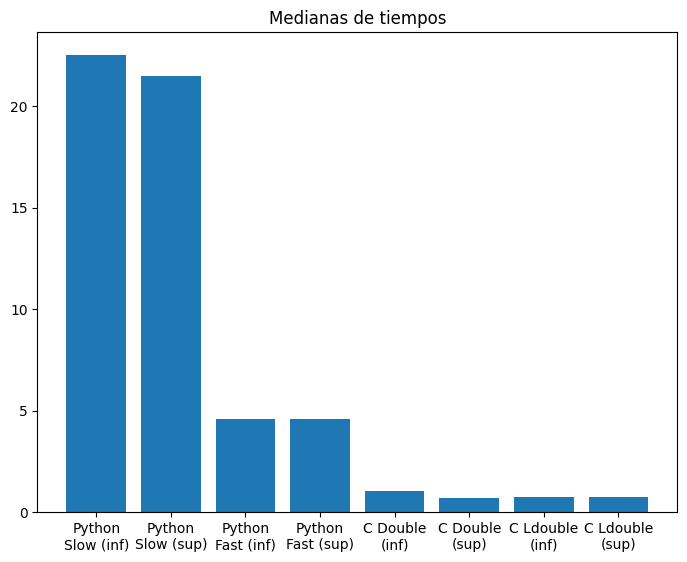

In [58]:
import matplotlib.pyplot as plt
medianas = mediana_py_slow1, mediana_py_slow2, mediana_py_fast1, mediana_py_fast2, mediana_c_double1, mediana_c_double2, mediana_c_longdouble1, mediana_c_longdouble2

fig1 = plt.figure()
ax = fig1.add_axes([0,0,1,1])
casos = ["Python\nSlow (inf)","Python\nSlow (sup)","Python\nFast (inf)","Python\nFast (sup)","C Double\n(inf)","C Double\n(sup)","C Ldouble\n(inf)","C Ldouble\n(sup)"]
ax.bar(casos, medianas)
plt.title('Medianas de tiempos')
plt.show()

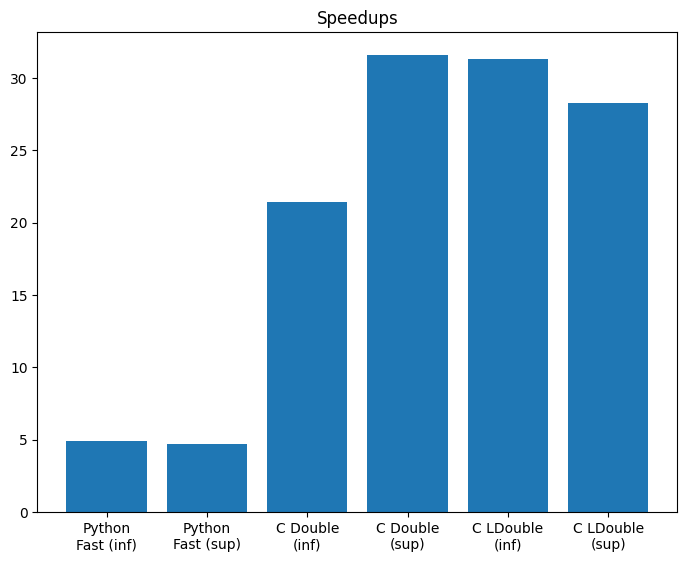

In [59]:
speedups = mediana_py_slow1/mediana_py_fast1, mediana_py_slow2/mediana_py_fast2, mediana_py_slow1/mediana_c_double1, mediana_py_slow2/mediana_c_double2, mediana_py_slow1/mediana_c_longdouble1, mediana_py_slow2/mediana_c_longdouble2

fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
casos = ["Python\nFast (inf)","Python\nFast (sup)","C Double\n(inf)","C Double\n(sup)","C LDouble\n(inf)","C LDouble\n(sup)"]
ax.bar(casos, speedups)
plt.title('Speedups')
plt.show()

In [60]:
import numpy as np

def calc_sins(f,inf,sup,n_angs,n_terms):
    arr_angs = np.linspace(inf,sup,n_angs)
    sins = []
    for x,N in zip(arr_angs,n_terms):
        sins.append(f(x,N))
    return np.array(sins)

In [61]:
def encontrar_mediana_de_mediciones_sins(f,inf,sup,n_terms,n_iter):
    tiempos = []
    n_args = 1000
    
    for it in range(n_iter):
        tic = time.perf_counter()
        calc_sins(f,inf,sup,n_args,n_terms)
        toc = time.perf_counter()
        
        tiempos.append(1e6*(toc-tic))

    return statistics.median(tiempos)

In [62]:
n_iter = 50

mediana_calc_sins_py_slow = encontrar_mediana_de_mediciones_sins(py_slow_sin,inf,sup,terms_py_slow,n_iter)
print("Mediana de mediciones de tiempo en Python (slow):", mediana_calc_sins_py_slow)

mediana_calc_sins_py_fast = encontrar_mediana_de_mediciones_sins(py_fast_sin,inf,sup,terms_py_fast,n_iter)
print("Mediana de mediciones de tiempo en Python (fast):", mediana_calc_sins_py_fast)

mediana_calc_sins_c_double = encontrar_mediana_de_mediciones_sins(c_sin_double,inf,sup,terms_double,n_iter)
print("Mediana de mediciones de tiempo en C (double):", mediana_calc_sins_c_double)

mediana_calc_sins_c_longdouble = encontrar_mediana_de_mediciones_sins(c_sin_longdouble,inf,sup,terms_longdouble,n_iter)
print("Mediana de mediciones de tiempo en C (longdouble):", mediana_calc_sins_c_longdouble)

Mediana de mediciones de tiempo en Python (slow): 24423.714998192736
Mediana de mediciones de tiempo en Python (fast): 6897.61400099087
Mediana de mediciones de tiempo en C (double): 896.8955007730983
Mediana de mediciones de tiempo en C (longdouble): 830.485500046052


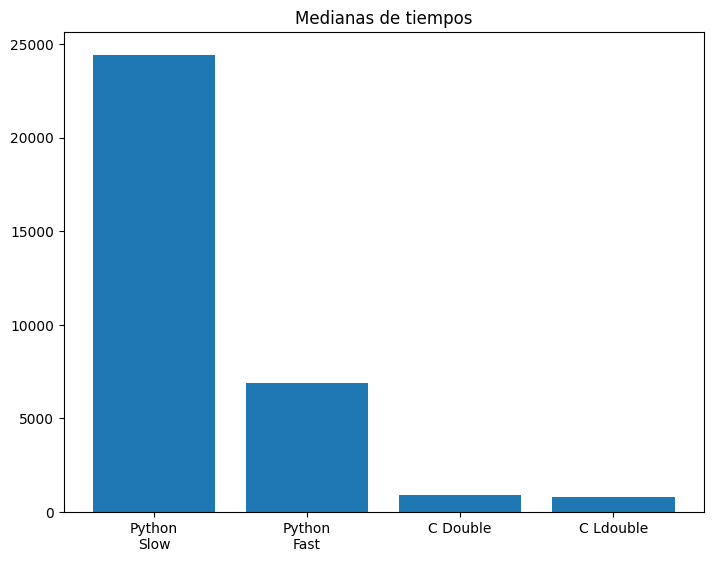

In [63]:
import matplotlib.pyplot as plt
medianas_calc = mediana_calc_sins_py_slow, mediana_calc_sins_py_fast, mediana_calc_sins_c_double, mediana_calc_sins_c_longdouble

fig3 = plt.figure()
ax = fig3.add_axes([0,0,1,1])
casos = ["Python\nSlow","Python\nFast","C Double","C Ldouble"]
ax.bar(casos, medianas_calc)
plt.title('Medianas de tiempos')
plt.show()

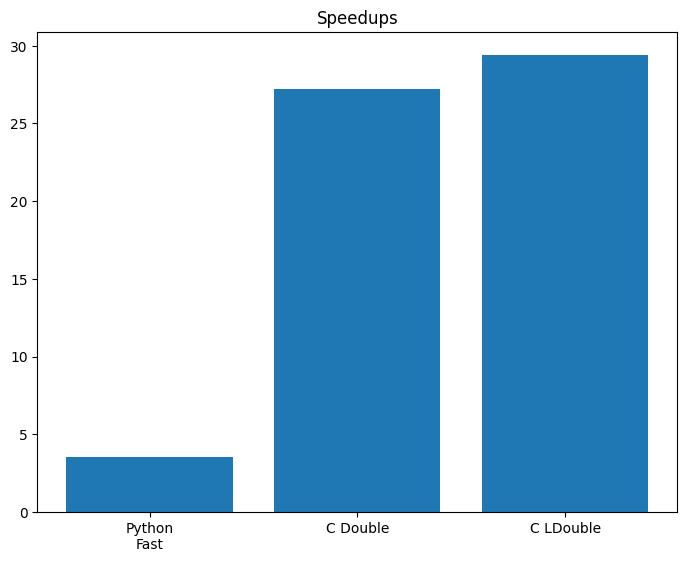

In [64]:
speedups = mediana_calc_sins_py_slow/mediana_calc_sins_py_fast, mediana_calc_sins_py_slow/mediana_calc_sins_c_double, mediana_calc_sins_py_slow/mediana_calc_sins_c_longdouble

fig4 = plt.figure()
ax = fig4.add_axes([0,0,1,1])
casos = ["Python\nFast","C Double","C LDouble"]
ax.bar(casos, speedups)
plt.title('Speedups')
plt.show()